In [23]:
import numpy
import matplotlib.pyplot as plt
from matplotlib_params import set_plt_params
set_plt_params(plt)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [69]:
import json

with open('spectrum_lines.json', 'r') as f:
        spectral_lines = json.load(f)
        
h_names = {'Ha':r'H$_{\alpha}$', 'Hb':r'H$_{\beta}$', 'Hg':r'H$_{\gamma}$', 'Hd':r'H$_{\delta}$', 'He':r'H$_{\epsilon}$'}
h_names.keys()

a_names = {'H':'', 'K':'H $\&$ K', 'Na':'Na', 'G':'G', 'Mg':'Mg'}
a_names.keys()

e_names = {'O III 5007':'OIII', 'S II 6732':'S II', 'N II 6549':'', 'N II 6585':'NII'}
e_names.keys()

dict_keys(['O III 5007', 'S II 6732', 'N II 6549', 'N II 6585'])

# From get spectra from SDSS (not normalized)

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.sdss import SDSS

plate = 338
mjd = 51694
fiber = 511

z = 0.047

wmin = 3600
wmax = 8000

plt.figure(figsize = (13,5))
# query SDSS database for this object
spectra = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)
print("got the spectra, length: %s" % len(spectra))

# plot the spectrum
data = spectra[0][1].data
wavelength = 10 ** data['loglam']/(1+z)
flux = data['flux']

locs = numpy.where((wavelength > wmin) & (wavelength < wmax)  )
wavelength = wavelength[locs]
flux = flux[locs]

plt.rcParams['figure.figsize'] = 10, 4
plt.step(wavelength, flux, "k")
#plt.title("The Hand of Pooh")
plt.xlabel("rest wavelength", fontsize = 20)
plt.ylabel("$\\mathrm{flux\\,[10^{-17}\\, erg \\, cm^{-2} \\, s^{-1} \\, \\AA^{-1}] }$", fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

ylim = plt.gca().get_ylim()
ymin = ylim[0]
ymax = ylim[1]
d = ymax - ymin
for sl in spectral_lines['emission']:
    slw = sl['wavelength']
    sln = sl['name']
    if (slw > wmin) and (slw < wmax):
        if sln in h_names.keys():
            p_name = h_names[sln]
            plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'crimson', lw = 3, alpha = 0.7 )
            plt.text(x = slw + 10, y = ymin +  d / 50, s = p_name, color = 'crimson')
        if sln in e_names.keys():
            p_name = e_names[sln]
            plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'purple', lw = 3, alpha = 0.5 )
            if 'NII' in p_name:
                plt.text(x = slw - 250, y = ymax -  d / 10, s = p_name, color = 'purple')
            else:
                plt.text(x = slw + 10, y = ymax -  d / 10, s = p_name, color = 'purple')
            
for sl in spectral_lines['absorption']:
    slw = sl['wavelength']
    sln = sl['name']
    if (slw > wmin) and (slw < wmax):
        if sln in a_names.keys():
            p_name = a_names[sln]
            plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'teal', lw = 3, alpha = 0.7 )
            if 'Na' in p_name:
                plt.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal')
            else:
                plt.text(x = slw - 400, y = ymin +  d / 50, s = p_name, color = 'teal')
#plt.legend()      
plt.ylim(ylim)    
plt.tight_layout()
plt.show()

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


ValueError: Some errors were detected !
    Line #60 (got 4 columns instead of 1)
    Line #123 (got 2 columns instead of 1)
    Line #124 (got 2 columns instead of 1)
    Line #130 (got 2 columns instead of 1)
    Line #131 (got 4 columns instead of 1)
    Line #132 (got 2 columns instead of 1)
    Line #135 (got 2 columns instead of 1)

<Figure size 936x360 with 0 Axes>

# From spectra matrix (normalized)

In [100]:
#wave = numpy.load('/Volumes/Backup/galaxies_on_toast/wave.npy') 
#specs = numpy.load('/Volumes/Backup/galaxies_on_toast/specs.npy')
specobjids = numpy.load('/Volumes/Backup/galaxies_on_toast/specobjids.npy')

In [99]:



def plot_spec(idx, wmin = 3600, wmax = 7000, set_ymax = None, save_to=None):
    
    

    plt.figure(figsize = (13,4))

    wavelength_all = wave.copy()

    locs = numpy.where((wavelength_all > wmin) & (wavelength_all < wmax)  )
    wavelength = wavelength_all[locs]
    flux = numpy.log( 1 + specs[idx][locs])

    plt.rcParams['figure.figsize'] = 10, 4
    plt.step(wavelength, flux, "k")
    #plt.title("The Hand of Pooh")
    plt.xlabel("rest wavelength", fontsize = 20)
    plt.ylabel("log(normalized flux)", fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    pax = plt.gca()
    ylim = pax.get_ylim()
    ylim = list(ylim)
    if not set_ymax is None:
        ylim[1] = set_ymax
    ymin = ylim[0]
    ymax = ylim[1]
    d = ymax - ymin
    for sl in spectral_lines['emission']:
        slw = sl['wavelength']
        sln = sl['name']
        if (slw > wmin) and (slw < wmax):
            if sln in h_names.keys():
                p_name = h_names[sln]
                plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'crimson', lw = 3, alpha = 0.7 )
                plt.text(x = slw + 10, y = ymin +  d / 50, s = p_name, color = 'crimson', fontsize = 15)
            if sln in e_names.keys():
                p_name = e_names[sln]
                plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'purple', lw = 3, alpha = 0.5 )
                if 'NII' in p_name:
                    plt.text(x = slw - 250, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)
                else:
                    plt.text(x = slw + 10, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)

    for sl in spectral_lines['absorption']:
        slw = sl['wavelength']
        sln = sl['name']
        if (slw > wmin) and (slw < wmax):
            if sln in a_names.keys():
                p_name = a_names[sln]
                plt.vlines(slw , ymin = ymin, ymax = ymax, color = 'teal', lw = 3, alpha = 0.7 )
                if ('Na' in p_name):
                    plt.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                elif ('G' in p_name):
                    plt.text(x = slw - 60, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                elif ('Mg' in p_name):
                    plt.text(x = slw - 100, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                else:
                    plt.text(x = slw - 220, y = ymax -  d / 10, s = p_name, color = 'teal', fontsize = 15)
    #plt.legend()   
    if False:
        new_axes = inset_axes(pax,
                            width="30%", # width = 30% of parent_bbox
                            height=1., # height : 1 inch
                            loc=9)
        new_axes.set_yticks([])
        wmin, wmax = 5800, 6000
        locs = numpy.where((wavelength_all > wmin) & (wavelength_all < wmax)  )
        wavelength = wavelength_all[locs]
        flux = specs[idx][locs]
        new_axes.step(wavelength, flux, "k")
        for sl in spectral_lines['absorption']:
            slw = sl['wavelength']
            sln = sl['name']
            if (slw > wmin) and (slw < wmax):
                if sln in a_names.keys():
                    p_name = a_names[sln]
                    new_axes.vlines(slw , ymin = ymin, ymax = ymax, color = 'teal', lw = 3, alpha = 0.7 )
                    if 'Na' in p_name:
                        new_axes.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)

    plt.ylim(ylim)    
    plt.tight_layout()
    if save_to is None:
        pass
    else:
        plt.savefig(save_to)
    plt.show()
    return

In [131]:



def plot_broken_spec(idx, wmin = 3600, wmax = 7000, set_ymax = None, save_to=None):

    f, axs = plt.subplots(1,2,figsize = (13,4), sharey = True)
    
    wmin_list = [3600, 5860]
    wmax_list = [5100, 7000]
    for i, ax in enumerate(axs):
        wmin = wmin_list[i]
        wmax = wmax_list[i]
        wavelength_all = wave.copy()

        locs = numpy.where((wavelength_all > wmin) & (wavelength_all < wmax)  )
        wavelength = wavelength_all[locs]
        flux = numpy.log( 1 + specs[idx][locs])

        ax.step(wavelength, flux, "k")
        if i == 0:
            ax.set_ylabel("log(normalized flux)", fontsize = 20)
            ax.spines['right'].set_visible(False)
        else:
            ax.spines['left'].set_visible(False)
            ax.tick_params(labelleft=False)
        ax.set_xlabel("rest wavelength", fontsize = 20)
        
        #plt.yticks(fontsize = 20)
        #plt.xticks(fontsize = 20)

        pax = plt.gca()
        ylim = pax.get_ylim()
        ylim = list(ylim)
        if not set_ymax is None:
            ylim[1] = set_ymax
        ymin = ylim[0]
        ymax = ylim[1]
        d = ymax - ymin
        for sl in spectral_lines['emission']:
            slw = sl['wavelength']
            sln = sl['name']
            if (slw > wmin) and (slw < wmax):
                if sln in h_names.keys():
                    p_name = h_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'crimson', lw = 3, alpha = 0.7 )
                    ax.text(x = slw + 10, y = ymin +  d / 50, s = p_name, color = 'crimson', fontsize = 15)
                if sln in e_names.keys():
                    p_name = e_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'purple', lw = 3, alpha = 0.5 )
                    if 'NII' in p_name:
                        ax.text(x = slw - 250, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)
                    else:
                        ax.text(x = slw + 10, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)

        for sl in spectral_lines['absorption']:
            slw = sl['wavelength']
            sln = sl['name']
            if (slw > wmin) and (slw < wmax):
                if sln in a_names.keys():
                    p_name = a_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'teal', lw = 3, alpha = 0.7 )
                    if ('Na' in p_name):
                        ax.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    elif ('G' in p_name):
                        ax.text(x = slw - 60, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    elif ('Mg' in p_name):
                        ax.text(x = slw - 100, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    else:
                        ax.text(x = slw - 220, y = ymax -  d / 10, s = p_name, color = 'teal', fontsize = 15)

        ax.set_ylim(ylim)    
    plt.tight_layout()
    if save_to is None:
        pass
    else:
        plt.savefig(save_to)
    plt.show()
    return

In [182]:



def plot_spec_nadsub(idx, wmin = 3600, wmax = 7000, set_ymax = None, save_to=None):

    f, axs = plt.subplots(1,2,figsize = (13,4), sharey = False,  gridspec_kw={'width_ratios': [4, 1]})
    
    wmin_list = [wmin, 5800]
    wmax_list = [wmax, 6000]
    for i, ax in enumerate(axs):
        wmin = wmin_list[i]
        wmax = wmax_list[i]
        wavelength_all = wave.copy()

        locs = numpy.where((wavelength_all > wmin) & (wavelength_all < wmax)  )
        wavelength = wavelength_all[locs]
        flux = numpy.log( 1 + specs[idx][locs])

        ax.step(wavelength, flux, "k")
        if i == 0:
            ax.set_ylabel("log(normalized flux)", fontsize = 20)
        else:
            #ax.yaxis.tick_left()
            #ax.yaxis.tick_right()
            #ax.yaxis.set_ticks_position('none') 
            pass

        ax.set_xlabel("rest wavelength", fontsize = 20)
        
        #plt.yticks(fontsize = 20)
        #plt.xticks(fontsize = 20)

        ylim = ax.get_ylim()
        ylim = list(ylim)
        if i == 0:
            if not set_ymax is None:

                ylim[1] = set_ymax
        ymin = ylim[0]
        ymax = ylim[1]
        d = ymax - ymin
        for sl in spectral_lines['emission']:
            slw = sl['wavelength']
            sln = sl['name']
            if (slw > wmin) and (slw < wmax):
                if sln in h_names.keys():
                    p_name = h_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'crimson', lw = 3, alpha = 0.7 )
                    ax.text(x = slw + 10, y = ymin +  d / 50, s = p_name, color = 'crimson', fontsize = 15)
                if sln in e_names.keys():
                    p_name = e_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'purple', lw = 3, alpha = 0.5 )
                    if 'NII' in p_name:
                        ax.text(x = slw - 250, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)
                    else:
                        ax.text(x = slw + 10, y = ymax -  d / 10, s = p_name, color = 'purple', fontsize = 15)

        for sl in spectral_lines['absorption']:
            slw = sl['wavelength']
            sln = sl['name']
            if (slw > wmin) and (slw < wmax):
                if sln in a_names.keys():
                    p_name = a_names[sln]
                    ax.vlines(slw , ymin = ymin, ymax = ymax, color = 'teal', lw = 3, alpha = 0.7 )
                    if ('Na' in p_name):
                        ax.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    elif ('G' in p_name):
                        ax.text(x = slw - 60, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    elif ('Mg' in p_name):
                        ax.text(x = slw + 15, y = ymin +  d / 50, s = p_name, color = 'teal', fontsize = 15)
                    else:
                        ax.text(x = slw - 270, y = ymax -  d / 10, s = p_name, color = 'teal', fontsize = 15)

        ax.set_ylim(ylim)    
    plt.tight_layout()
    if save_to is None:
        pass
    else:
        plt.savefig(save_to)
    plt.show()
    return

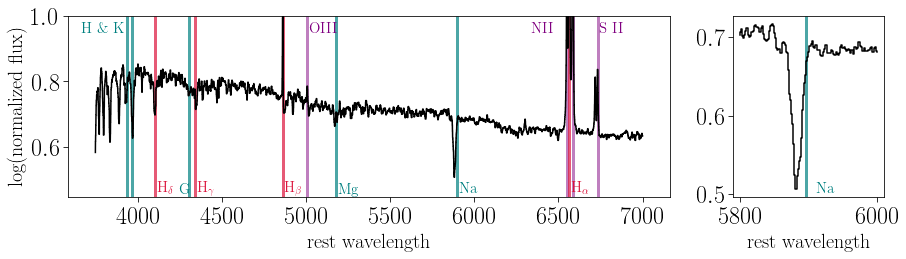

In [193]:
idx = 1613
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(int(specobjids[idx]))
plot_spec_nadsub(idx = idx, set_ymax=1, save_to=fname)

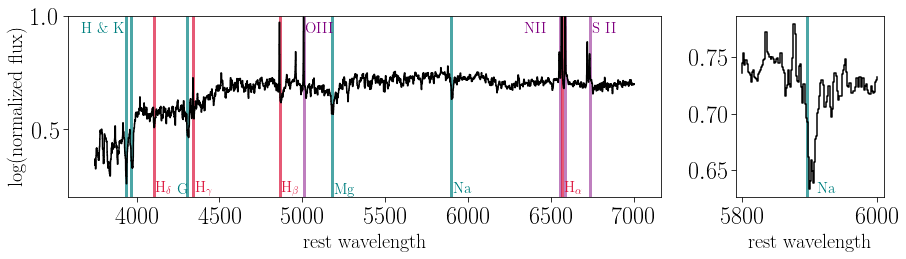

In [194]:
idx = 82200
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(int(specobjids[idx]))
plot_spec_nadsub(idx = idx, set_ymax=1, save_to=fname)

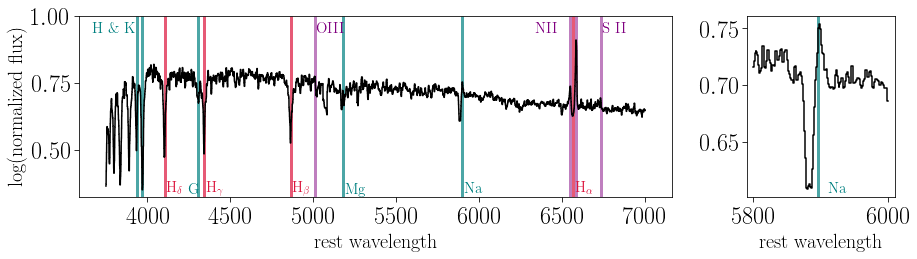

In [195]:
idx = 9462
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(int(specobjids[idx]))
plot_spec_nadsub(idx = idx, set_ymax=1, save_to=fname)

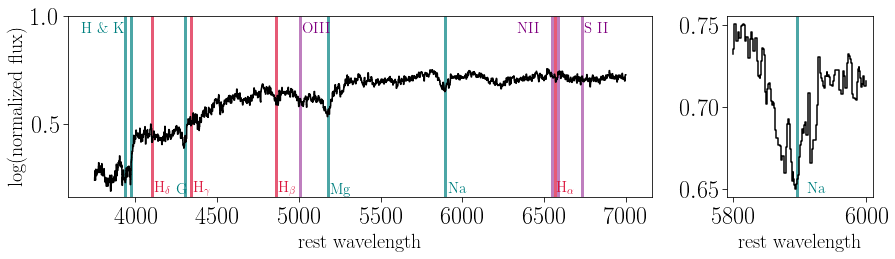

In [196]:
idx = 128651
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(int(specobjids[idx]))
plot_spec_nadsub(idx = idx, set_ymax=1, save_to=fname)

# drafts

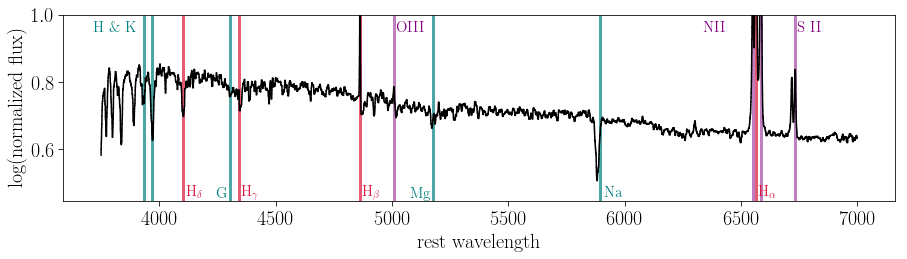

In [187]:
idx = 1613
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

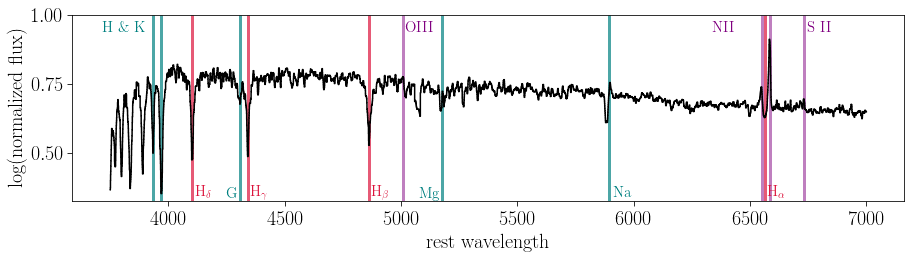

In [106]:
idx = 9462
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

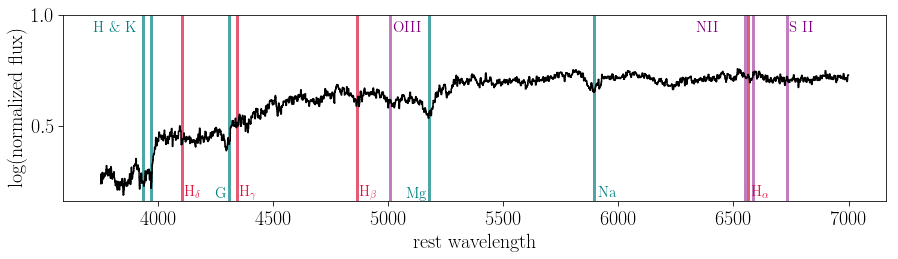

In [174]:
idx = 128651
fname = '/Users/itamar/Documents/Writes/anomaly_detection_umaps/{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

In [ ]:
idx = 128651
fname = '{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

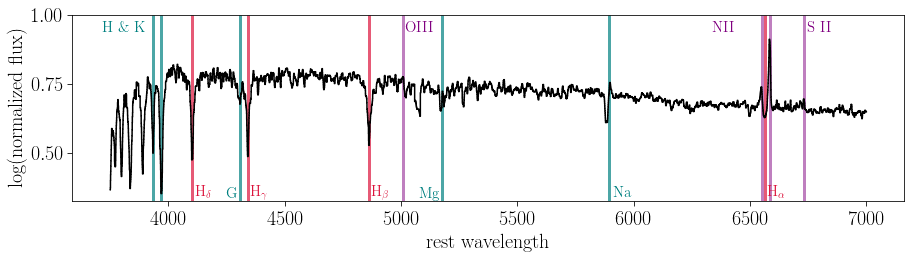

In [103]:
idx = 9462
fname = '{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

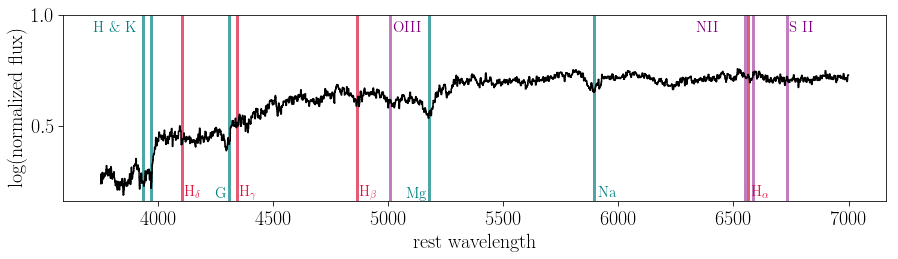

In [108]:
idx = 128651
fname = '{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, save_to=fname)

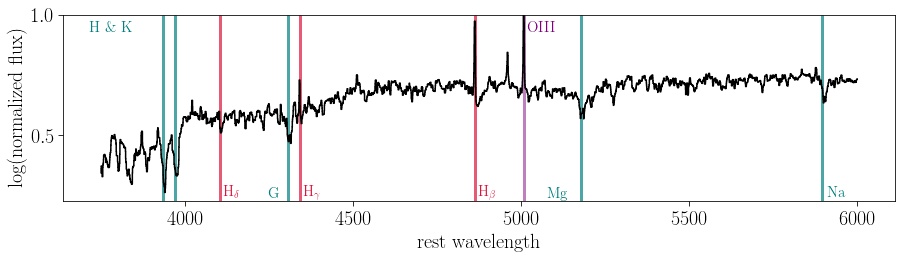

In [111]:
idx = 82200
fname = '{}.pdf'.format(specobjids[idx])
plot_spec(idx = idx, set_ymax=1, wmax = 6000, save_to=fname)

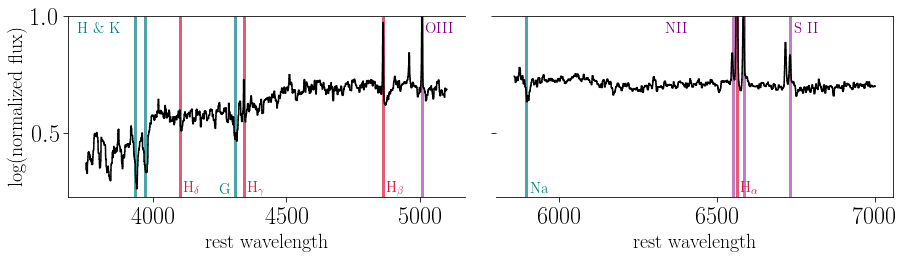

In [132]:
idx = 82200
fname = '{}.pdf'.format(specobjids[idx])
plot_broken_spec(idx = idx, set_ymax=1, wmax = 6000, save_to=fname)

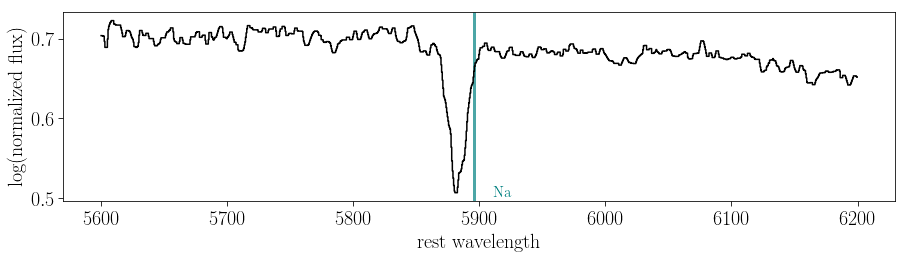

In [134]:
plot_spec(idx = 1613, wmin = 5600, wmax = 6200)

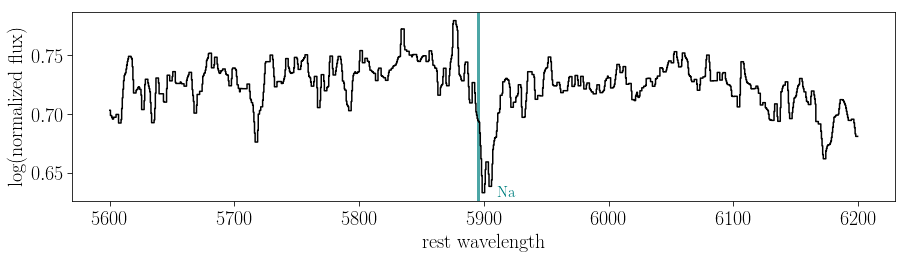

In [135]:
plot_spec(idx = 82200, wmin = 5600, wmax = 6200)

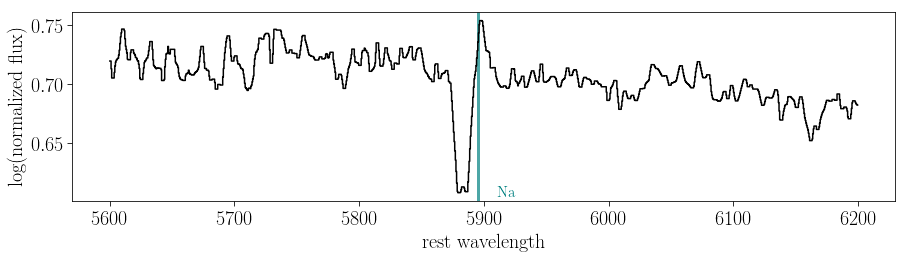

In [62]:
plot_spec(idx = 9462, wmin = 5600, wmax = 6200)

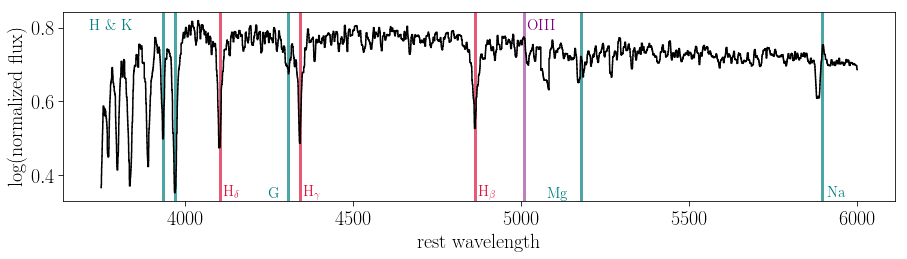

In [96]:
plot_spec(idx = 9462, wmax = 6000)

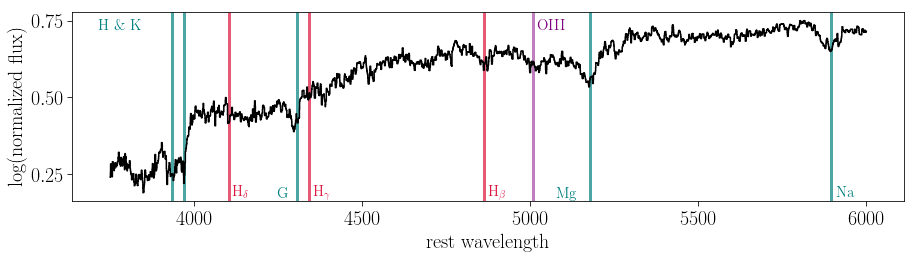

In [95]:
plot_spec(idx = 128651, wmax = 6000)#128651, 84863, 121625

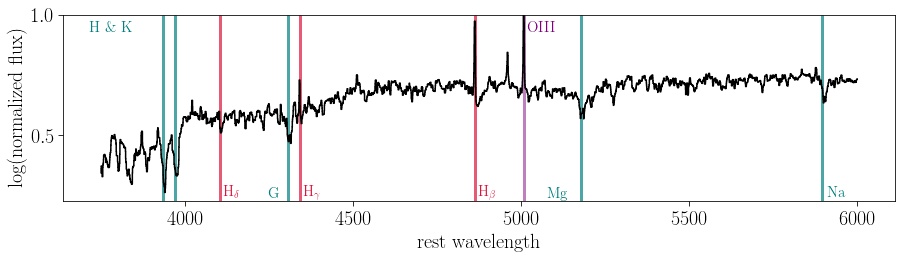

In [94]:
plot_spec(idx =  82200, set_ymax=1, wmax = 6000) #145421, 29682, 82200

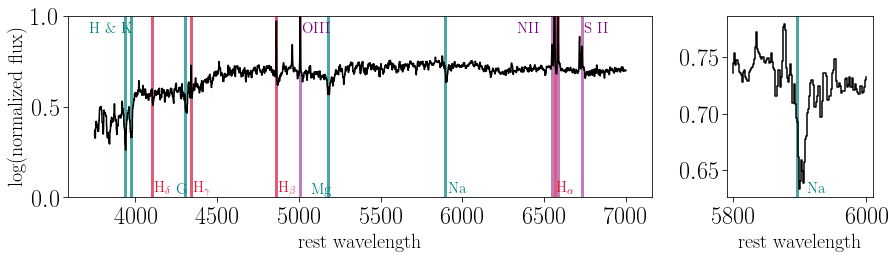

In [167]:
plot_spec_nadsub(idx =  82200, set_ymax=1) #145421, 29682, 82200

In [142]:
ax

NameError: name 'ax' is not defined